# Q5. Use the available variables to construct a model that predicts delays 

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)

Opening the datasets with necessary columns and concatenating the two years

In [2]:
dataset_2006 = pd.read_csv("2006.csv", usecols = ['Year','Month','DayOfWeek','CRSDepTime','CRSElapsedTime','FlightNum','TailNum','UniqueCarrier','DepDelay', 'Distance', 'LateAircraftDelay'])
dataset_2007 = pd.read_csv("2007.csv", usecols = ['Year','Month','DayOfWeek','CRSDepTime','CRSElapsedTime','FlightNum','TailNum','UniqueCarrier','DepDelay', 'Distance', 'LateAircraftDelay'])
plane_data = pd.read_csv("plane-data.csv", usecols = ['tailnum','year'])
dfq5 = pd.concat([dataset_2006, dataset_2007])

Cleaning the data

In [3]:
plane_data = plane_data.replace(to_replace='0000', value=np.nan).dropna()
plane_data = plane_data.replace(to_replace='None', value=np.nan).dropna()

In [4]:
dfq5.info()
dfq5.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14595137 entries, 0 to 7453214
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayOfWeek          int64  
 3   CRSDepTime         int64  
 4   UniqueCarrier      object 
 5   FlightNum          int64  
 6   TailNum            object 
 7   CRSElapsedTime     float64
 8   DepDelay           float64
 9   Distance           int64  
 10  LateAircraftDelay  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ GB


,Year,Month,DayOfWeek,CRSDepTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,DepDelay,Distance,LateAircraftDelay
0,2006,1,3,745,US,343,N657AW,273.0,-2.0,1587,0
1,2006,1,3,1053,US,613,N834AW,265.0,0.0,1587,0
2,2006,1,3,1915,US,617,N605AW,258.0,0.0,1587,0
3,2006,1,3,1755,US,300,N312AW,158.0,-2.0,872,0
4,2006,1,3,832,US,765,N309AW,163.0,-8.0,872,0


Merging the two datasets on Tail number

In [5]:
dfq5 = dfq5.rename(columns={'TailNum': 'tailnum'})

dfq5 = pd.merge(dfq5, plane_data,  

 on='tailnum',  

 how='inner')

dfq5

,Year,Month,DayOfWeek,CRSDepTime,UniqueCarrier,FlightNum,tailnum,CRSElapsedTime,DepDelay,Distance,LateAircraftDelay,year
0,2006,1,3,745,US,343,N657AW,273.0,-2.0,1587,0,1999
1,2006,1,3,1912,US,9,N657AW,199.0,1.0,1440,0,1999
2,2006,1,4,2359,US,374,N657AW,92.0,-4.0,407,0,1999
3,2006,1,4,729,US,182,N657AW,230.0,-5.0,1440,0,1999
4,2006,1,4,1300,US,570,N657AW,230.0,5.0,1788,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...
11664084,2007,12,7,2010,B6,649,N665JB,395.0,-7.0,2586,0,2007
11664085,2007,12,1,1940,B6,5,N665JB,90.0,3.0,301,0,2007
11664086,2007,12,1,1720,B6,6,N665JB,101.0,-4.0,301,0,2007
11664087,2007,12,1,2150,B6,809,N665JB,190.0,5.0,1069,0,2007


In [6]:
dfq5 = dfq5.rename(columns={'year': 'ManuYear'})

In [7]:
dfq5.isnull().sum()

Year                     0
Month                    0
DayOfWeek                0
CRSDepTime               0
UniqueCarrier            0
FlightNum                0
tailnum                  0
CRSElapsedTime           8
DepDelay             70336
Distance                 0
LateAircraftDelay        0
ManuYear                 0
dtype: int64

In [8]:
dfq5 = dfq5[pd.notnull(dfq5['CRSElapsedTime'])]
dfq5 = dfq5[pd.notnull(dfq5['DepDelay'])]
dfq5 = dfq5[pd.notnull(dfq5['ManuYear'])]

dfq5.isnull().sum()

Year                 0
Month                0
DayOfWeek            0
CRSDepTime           0
UniqueCarrier        0
FlightNum            0
tailnum              0
CRSElapsedTime       0
DepDelay             0
Distance             0
LateAircraftDelay    0
ManuYear             0
dtype: int64

Transforming DepTime to an hour format to reduce noice

In [9]:
dfq5['CRSDepTime'] = dfq5['CRSDepTime']//100
dfq5 = dfq5[dfq5['CRSDepTime'] < 23]

Taking a representative sample of the data due to constraints

In [10]:
dfq5 = dfq5.sample(n = 65000)
dfq5

,Year,Month,DayOfWeek,CRSDepTime,UniqueCarrier,FlightNum,tailnum,CRSElapsedTime,DepDelay,Distance,LateAircraftDelay,ManuYear
6039961,2006,2,2,10,EV,4286,N889AS,51.0,2.0,146,0,2001
9893213,2007,8,1,17,CO,1687,N57864,149.0,-3.0,853,0,2001
8471033,2006,8,4,17,NW,1249,N753NW,58.0,3.0,95,0,1968
9195974,2007,6,5,15,AA,302,N559AA,120.0,82.0,641,0,1991
2770280,2006,4,4,11,OO,3680,N585SW,58.0,-4.0,150,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...
1922785,2006,9,6,7,OH,5143,N479CA,61.0,0.0,225,0,2002
8185574,2007,6,5,6,NW,1771,N342NW,146.0,3.0,874,0,1993
8063033,2006,6,5,13,NW,754,N515US,113.0,-7.0,528,0,1986
5618378,2006,12,1,21,DL,1165,N906DA,86.0,-9.0,368,0,1995


In [11]:
dfq5.Year.value_counts()

2007    35439
2006    29561
Name: Year, dtype: int64

In [12]:
dfq5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65000 entries, 6039961 to 6959360
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               65000 non-null  int64  
 1   Month              65000 non-null  int64  
 2   DayOfWeek          65000 non-null  int64  
 3   CRSDepTime         65000 non-null  int64  
 4   UniqueCarrier      65000 non-null  object 
 5   FlightNum          65000 non-null  int64  
 6   tailnum            65000 non-null  object 
 7   CRSElapsedTime     65000 non-null  float64
 8   DepDelay           65000 non-null  float64
 9   Distance           65000 non-null  int64  
 10  LateAircraftDelay  65000 non-null  int64  
 11  ManuYear           65000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 6.4+ MB


Scaling the numeric features 

In [13]:
from sklearn.preprocessing import StandardScaler

dfq5_ready = dfq5.copy()
scaler = StandardScaler()
num_cols = ["Distance","CRSElapsedTime","LateAircraftDelay"]
dfq5_ready[num_cols] = scaler.fit_transform(dfq5[num_cols])

dfq5_ready.head()

,Year,Month,DayOfWeek,CRSDepTime,UniqueCarrier,FlightNum,tailnum,CRSElapsedTime,DepDelay,Distance,LateAircraftDelay,ManuYear
6039961,2006,2,2,10,EV,4286,N889AS,-1.082786,2.0,-1.017953,-0.233235,2001
9893213,2007,8,1,17,CO,1687,N57864,0.307992,-3.0,0.231769,-0.233235,2001
8471033,2006,8,4,17,NW,1249,N753NW,-0.983445,3.0,-1.108102,-0.233235,1968
9195974,2007,6,5,15,AA,302,N559AA,-0.103565,82.0,-0.142970,-0.233235,1991
2770280,2006,4,4,11,OO,3680,N585SW,-0.983445,-4.0,-1.010882,-0.233235,1999


In [14]:
dfq5_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65000 entries, 6039961 to 6959360
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               65000 non-null  int64  
 1   Month              65000 non-null  int64  
 2   DayOfWeek          65000 non-null  int64  
 3   CRSDepTime         65000 non-null  int64  
 4   UniqueCarrier      65000 non-null  object 
 5   FlightNum          65000 non-null  int64  
 6   tailnum            65000 non-null  object 
 7   CRSElapsedTime     65000 non-null  float64
 8   DepDelay           65000 non-null  float64
 9   Distance           65000 non-null  float64
 10  LateAircraftDelay  65000 non-null  float64
 11  ManuYear           65000 non-null  object 
dtypes: float64(4), int64(5), object(3)
memory usage: 6.4+ MB


Using one hot encoding for categorical features and encoding the target value

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['Year','Month','DayOfWeek','CRSDepTime','UniqueCarrier','FlightNum','tailnum','ManuYear']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(dfq5_ready[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
dfq5_ready = dfq5_ready.drop(cat_cols ,axis=1)
dfq5_ready.reset_index(inplace=True, drop=True)
dfq5_ready = pd.concat([df_encoded, dfq5_ready], axis=1)


# Encode target value
dfq5_ready['DepDelay'] = dfq5_ready['DepDelay'].apply(lambda x: 1 if x > 0 else 0)

dfq5_ready

,Year_2006,Year_2007,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,...,ManuYear_2002,ManuYear_2003,ManuYear_2004,ManuYear_2005,ManuYear_2006,ManuYear_2007,CRSElapsedTime,DepDelay,Distance,LateAircraftDelay
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.082786,1,-1.017953,-0.233235
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.307992,0,0.231769,-0.233235
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.983445,1,-1.108102,-0.233235
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.103565,1,-0.142970,-0.233235
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.983445,0,-1.010882,-0.233235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.940870,0,-0.878309,-0.233235
64996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.265417,1,0.268890,-0.233235
64997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.202906,0,-0.342714,-0.233235
64998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.586080,0,-0.625536,-0.233235


In [16]:
dfq5_ready['DepDelay'].value_counts()

0    37546
1    27454
Name: DepDelay, dtype: int64

In [17]:
# Select Features
feature = dfq5_ready.drop('DepDelay', axis=1)

# Select Target
target = dfq5_ready['DepDelay']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.3, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (45500, 11421)
Shape of testing feature: (19500, 11421)
Shape of training label: (45500,)
Shape of training label: (19500,)


Defining a function for model evaluation

In [18]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

#### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [20]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.6994358974358974
Precision: 0.8168898606176551
Recall: 0.3654034229828851
F1 Score: 0.5049412957175438
Cohens Kappa Score: 0.33163745854806626
Area Under Curve: 0.7312641796331656
Confusion Matrix:
 [[10650   670]
 [ 5191  2989]]


#### Decision Trees

In [21]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.6523589743589744
Precision: 0.595998355488557
Recall: 0.5316625916870416
F1 Score: 0.5619952187116366
Cohens Kappa Score: 0.27536108742678667
Area Under Curve: 0.6355985954279593
Confusion Matrix:
 [[8372 2948]
 [3831 4349]]


#### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

# Building LogisticRegression model 
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [25]:
# Evaluate Model
lr_eval = evaluate_model(lr, X_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

Accuracy: 0.6781538461538461
Precision: 0.6662011173184358
Recall: 0.4665036674816626
F1 Score: 0.548748921484038
Cohens Kappa Score: 0.3105080950593119
Area Under Curve: 0.7080311800737816
Confusion Matrix:
 [[9408 1912]
 [4364 3816]]


#### K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.6288205128205128
Precision: 0.573045905707196
Recall: 0.4517114914425428
F1 Score: 0.5051955154498222
Cohens Kappa Score: 0.2148221218099663
Area Under Curve: 0.6432639938832108
Confusion Matrix:
 [[8567 2753]
 [4485 3695]]


#### MTP neural networks

In [28]:
from sklearn.neural_network import MLPClassifier

# Building NN model 
nn = MLPClassifier(random_state=0)
nn.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [29]:
# Evaluate Model
nn_eval = evaluate_model(nn, X_test, y_test)

# Print result
print('Accuracy:', nn_eval['acc'])
print('Precision:', nn_eval['prec'])
print('Recall:', nn_eval['rec'])
print('F1 Score:', nn_eval['f1'])
print('Cohens Kappa Score:', nn_eval['kappa'])
print('Area Under Curve:', nn_eval['auc'])
print('Confusion Matrix:\n', nn_eval['cm'])

Accuracy: 0.64
Precision: 0.5731031005797832
Recall: 0.5558679706601467
F1 Score: 0.5643539779074097
Cohens Kappa Score: 0.2577380362380435
Area Under Curve: 0.6845399664786128
Confusion Matrix:
 [[7933 3387]
 [3633 4547]]


Model Comparison

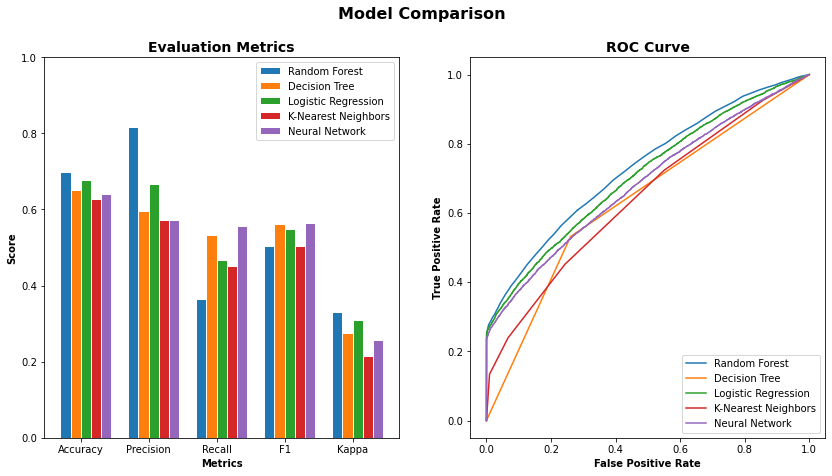

In [30]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.15
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
nn_score = [nn_eval['acc'], nn_eval['prec'], nn_eval['rec'], nn_eval['f1'], nn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r2, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r5, nn_score, width=barWidth, edgecolor='white', label='Neural Network')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest')
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree')
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression')
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Neighbors')
ax2.plot(nn_eval['fpr'], nn_eval['tpr'], label='Neural Network')

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()